# The Power of Elon Musk

In [117]:
# Read data from CSV files
from main import read_tweets
tweets_df = read_tweets()


In [120]:
import trends
import topics
from time import sleep
import pandas as pd
from datetime import timedelta
from matplotlib.dates import date2num
import matplotlib.pyplot as plt


topics_df = topics.get_tweets_with_topic(tweets_df)
likes_avg = tweets_df['likes_count'].mean()


def search_analysis(topic, topics_df, threshlow=30):
    '''
    topic: string, can be one of 'tesla', 'twitter', 'bitcoin', 'dogecoin', 'ford'
    topics_df: the return value of topics.get_tweets_with_topic()
    threshlow: number, the low threshold of peak

    return: the dataframe of important tweets
    '''
    import importlib
    importlib.reload(trends)

    kws = topics.KW_DICT[topic]
    # analysis start from 2015, because we cannot get any information from the data before 2015
    key_dates = trends.find_key_dates(
        kws, tf='2015-05-01 2022-03-05', threshlow=threshlow)
    key_dates = list(key_dates.stack().dropna().drop_duplicates())
    sleep(1.43)
    trend_df = trends.plot_trends(
        kws, key_dates, tf='2015-01-01 2022-03-05')
    trend_df.drop('isPartial', axis=1, inplace=True)

    plt.figure(figsize=(15, 6))
    for y in trend_df.columns:
        plt.plot(trend_df.index, trend_df[y])

    topic_df = topics_df[topic]
    # find all tweets have a date 30 days before any dat in the key date list
    key_tweets = pd.DataFrame()
    delta = timedelta(days=30)
    for d in key_dates:
        d = d.tz_localize('US/Central')
        t = topic_df[(topic_df['date'] >= d - delta) & (topic_df['date']
                                                        < d) & (topic_df['likes_count'] > likes_avg)]
        key_tweets = pd.concat([key_tweets, t])
    key_tweets = key_tweets.drop_duplicates()

    key_tweets_dates = list(key_tweets['date'].drop_duplicates())
    plt.vlines([date2num(d) for d in key_tweets_dates], 0, 100, colors='r', linewidth=0.5)

    plt.legend(labels=trend_df.columns)
    plt.savefig('./fig/' + topic + '.png')

    plt.show()
    plt.clf()

    return key_tweets


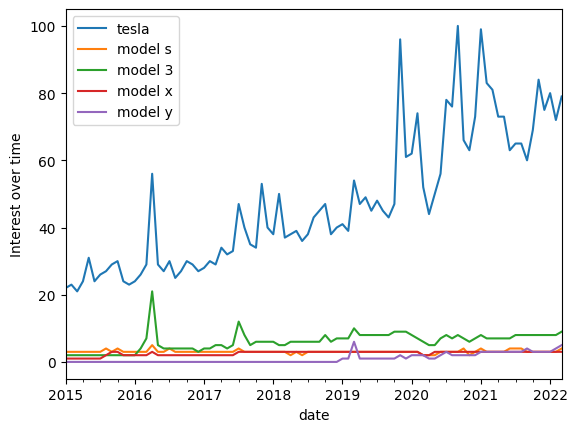

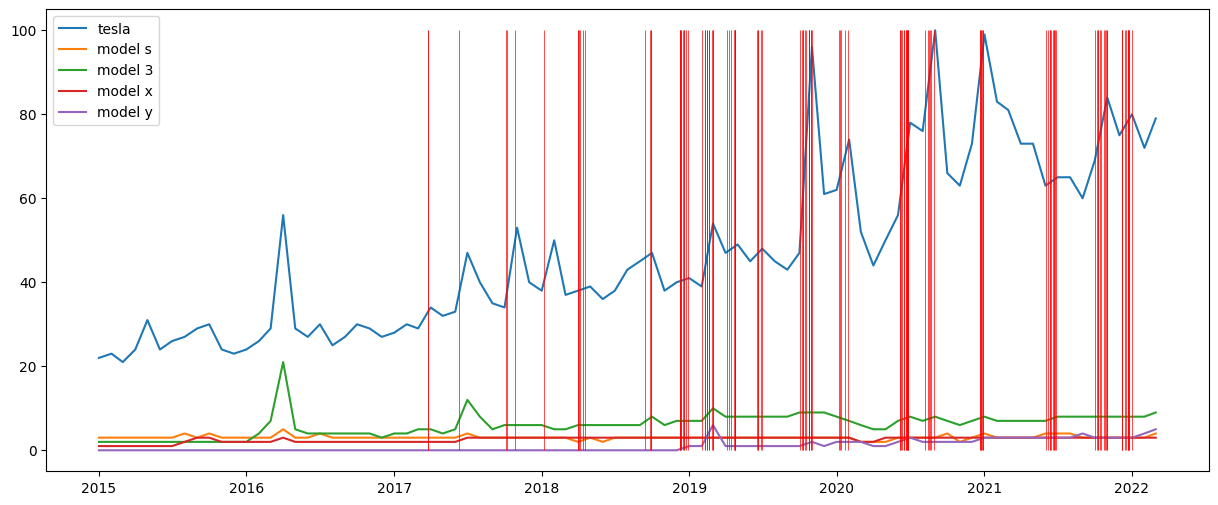

<Figure size 640x480 with 0 Axes>

In [9]:
tesla_key_tweets = search_analysis('tesla', topics_df)

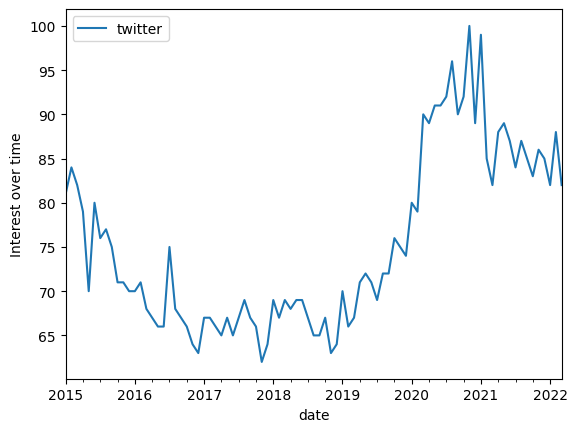

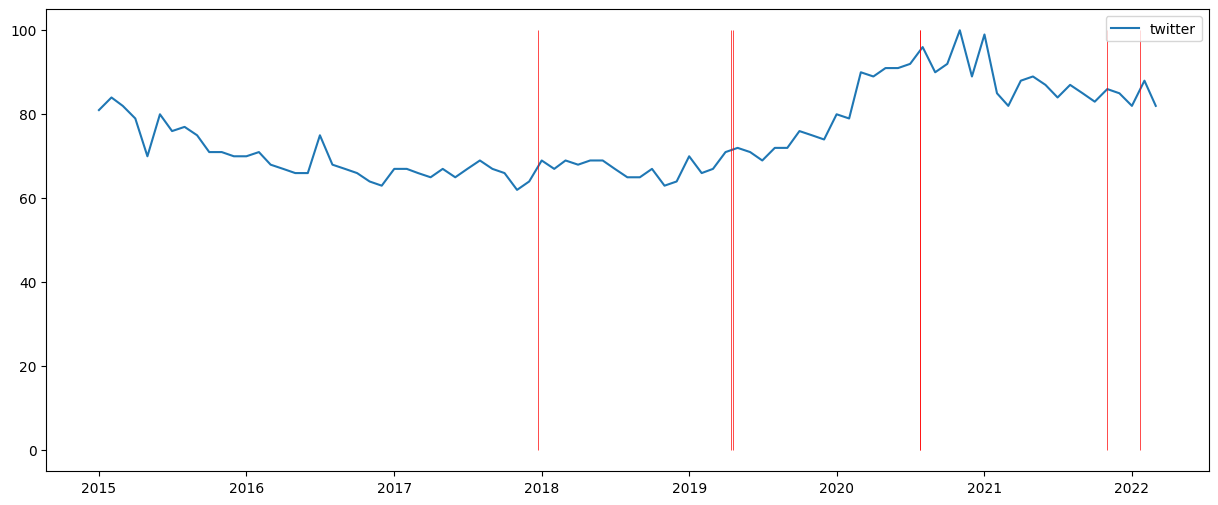

<Figure size 640x480 with 0 Axes>

In [10]:
twitter_key_tweets = search_analysis('twitter', topics_df)

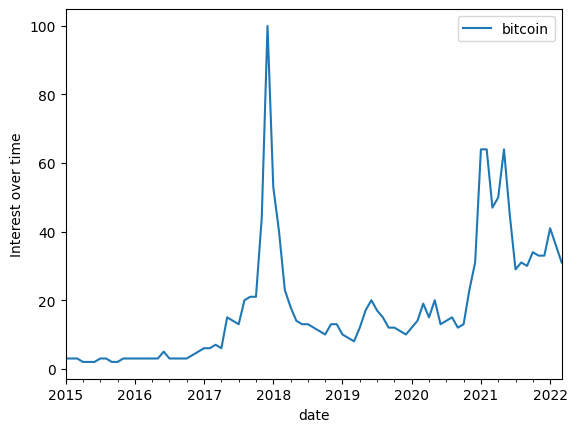

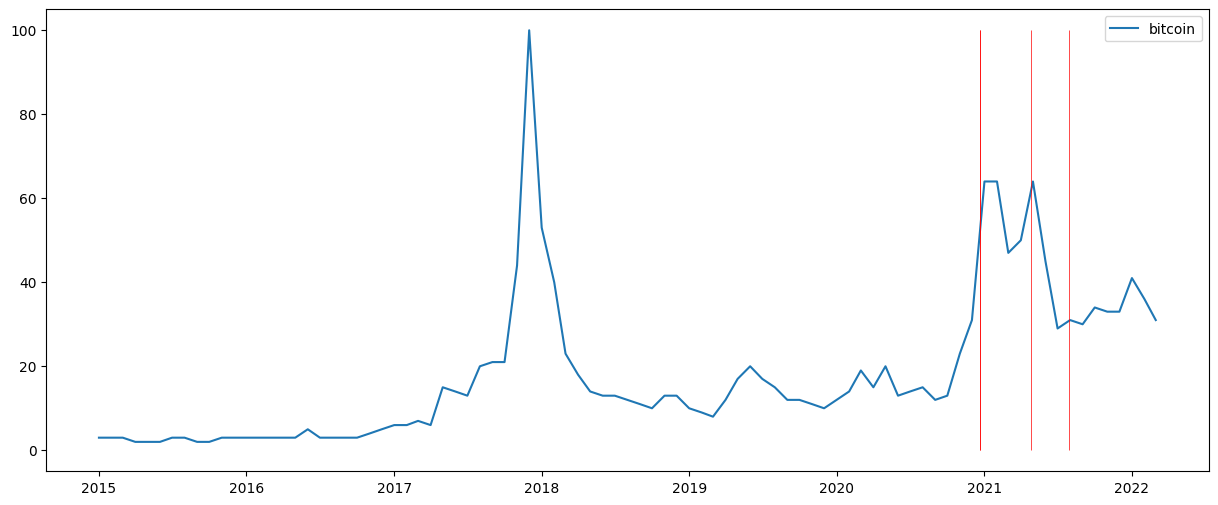

<Figure size 640x480 with 0 Axes>

In [11]:
bit_key_tweets = search_analysis('bitcoin', topics_df, threshlow=20)

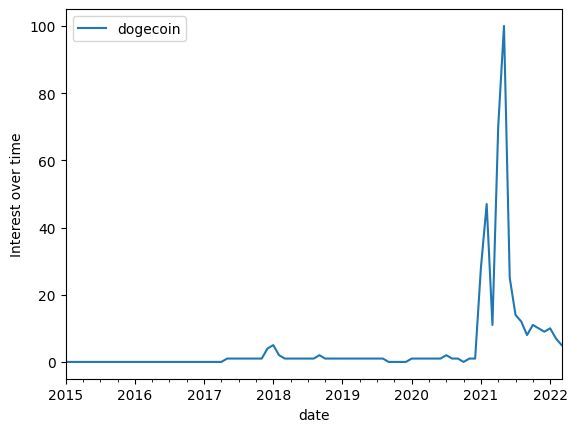

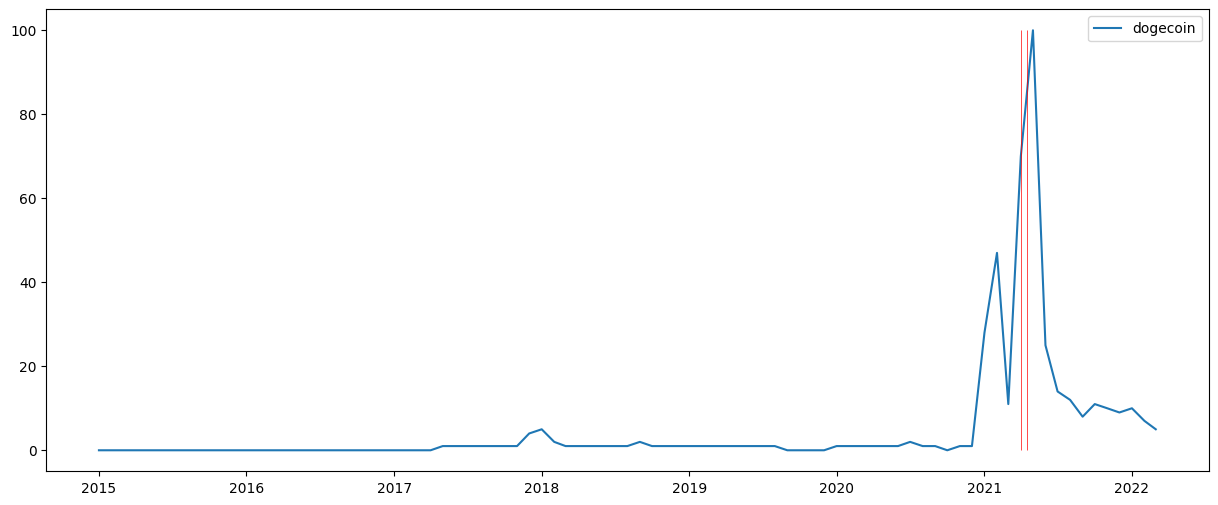

<Figure size 640x480 with 0 Axes>

In [12]:
doge_key_tweets = search_analysis('dogecoin', topics_df)